In [1]:
#This is Fantasy city simulator

In [ ]:
#importing packages
import numpy as np
import random
import names
import matplotlib.pyplot as plt

In [2]:
#citizen definition
class Citizen:
    def __init__(self, l, parent = "God", FirstName = "Kurt" , FamilyName = "Coban", gender = "female"):
        self.str = l[0]
        self.dex = l[1]
        self.con = l[2]
        self.int = l[3]
        self.wis = l[4]
        self.cha = l[5]
        self.l= l
        self.childlist = []
        self.parent = parent
        self.FirstName = FirstName
        self.FamilyName = FamilyName
        self.partner = None
        self.relationship = False
        self.married = False
        self.gender = gender
    def statblock(self):
        print(" Strength: " + str(self.str) 
        + "\n Dexterity: " + str(self.dex)
        + "\n Constituion: " + str(self.con)
        + "\n Intelligence: " + str(self.int)
        + "\n Wisdom: " + str(self.wis)
        + "\n Charisma: " + str(self.cha))
    def childlistadd(self,child):
        self.childlist.append(child)
    def __str__(self):
        return str(self.FirstName)+ " " + str(self.FamilyName)
    def print(self):
        return str(self.FirstName)+ " " + str(self.FamilyName)
    def selectmate(self,c1,married = False):
        self.partner = c1
        c1.partner = self
        self.relationship = True
        c1.relationship = True
        if married:
            self.married = True
            c1.married = True
    def mating(self,c1):
        if self.relationship:
            indices = random.sample(range(len(c1.l)),int(len(c1.l)/2))
            newpeepo = c1.l.copy()
            for i in range(int(len(c1.l))):
                if i in indices:
                    newpeepo[i]= self.l[i]
            child = Citizen(newpeepo,parent=[c1.print(),self.print()], FamilyName = self.FamilyName)        
            self.childlistadd(child)
            c1.childlistadd(child)
            return child


In [3]:
def random_citizen(femaleprop = 0.5):
    mu, sigma = 10, 1 # mean and standard deviation
    l = np.random.normal(mu, sigma, 6)
    l = [round(x) for x in l]
    if random.random() < femaleprop:
        gender = "female"
    else:
        gender = "male"
    FirstName = names.get_first_name(gender=gender)
    FamilyName = names.get_last_name()
    citizenlist.append(Citizen(l,FirstName= FirstName, FamilyName= FamilyName,gender=gender))


citizenlist = []
l = [10,12,8,10,12,8]

c1 = Citizen(l,FirstName= "David", FamilyName= "Duhlo")

l = [11,11,11,11,11,11]

c2 = Citizen(l,FirstName= "Daniella", FamilyName= "Weiler")
citizenlist = [c1,c2]

[print(x.gender) for x in citizenlist]

def creating_citizen():
    l=[]
    l.append(input("Enter strength:"))
    l.append(input("Enter dexterity:"))
    l.append(input("Enter constitution:"))
    l.append(input("Enter intelligence:"))
    l.append(input("Enter wisdom:"))
    l.append(input("Enter charisma:"))
    FirstName= input("Enter First Name:")
    FamilyName= input("Enter Last Name:")
    gender = input("Enter gender:")
    citizenlist.append(Citizen(l,FirstName= FirstName, FamilyName= FamilyName, gender = gender))
    

female
female


In [2]:
#citizen definition simplified
class Citizen:
    def __init__(self, l,gen = 1):
        self.str = l[0]
        self.dex = l[1]
        self.con = l[2]
        self.int = l[3]
        self.wis = l[4]
        self.cha = l[5]
        self.l= l
        self.partner = None
        self.gen = gen
    def statblock(self):
        print(" Strength: " + str(round(self.str)) 
        + "\n Dexterity: " + str(round(self.dex))
        + "\n Constituion: " + str(round(self.con))
        + "\n Intelligence: " + str(round(self.int))
        + "\n Wisdom: " + str(round(self.wis))
        + "\n Charisma: " + str(round(self.cha)))
    def selectmate(self,c):
        self.partner = c
    def printmate(self):
        return self.partner

In [3]:
def random_citizen(femaleprop = 0.5):
    mu, sigma = 10, 1 # mean and standard deviation
    l = np.random.normal(mu, sigma, 6)
    l = [round(x) for x in l]
    FamilyName = names.get_last_name()
    citizenlist.append(Citizen(l))

In [16]:
citizenlist = []
for i in range(10000):
    random_citizen()

In [17]:
generations = 20
for i in range(generations):
    #print(i)
    no_partner_people = [x for x in citizenlist if x.printmate() == None]
    if len(no_partner_people) % 2 != 0:
        no_partner_people = no_partner_people[:-1]
    l1 = random.sample(no_partner_people, len(no_partner_people) // 2)

    l2 = [x for x in no_partner_people if x not in l1]
    random.shuffle(l1)
    random.shuffle(l2)
    for k in range(len(l1)):
        l1[k].selectmate(l2[k])
        l2[k].selectmate(l1[k])
        new_statblock = []
        for n in range(6):
            mutation_strength = 0.05
            new_stat_value = (l1[k].l[n]+(l2[k].l[n]))/2 + np.random.normal(0, mutation_strength,1)[0]
            new_statblock.append(new_stat_value)
    
        citizenlist.append(Citizen(new_statblock, gen = i+2))
    

In [18]:
citizenlist[1998].gen

1

In [19]:
citizenlist[186].statblock()

 Strength: 9
 Dexterity: 10
 Constituion: 10
 Intelligence: 10
 Wisdom: 9
 Charisma: 9


In [21]:
mean_stat = []
for i in range(1,generations+1):
     mean_stat.append(np.mean([x.l[0] for x in citizenlist if x.gen == i]))
    


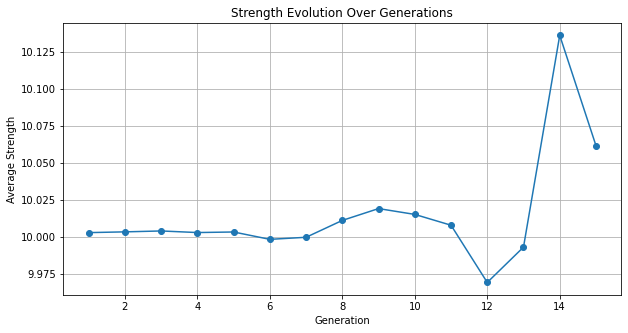

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, generations+1), mean_stat, marker='o', linestyle='-')
plt.xlabel("Generation")
plt.ylabel("Average Strength score")
plt.title("Strength score Evolution Over Generations")
plt.grid()
plt.show()

In [23]:
mean_stat

[10.0028,
 10.00331471772552,
 10.003924256906805,
 10.00284733889314,
 10.003228492768592,
 9.99825017687679,
 9.999646484723707,
 10.011067369196601,
 10.019062311527676,
 10.015122645579476,
 10.00780747425797,
 9.96908697166376,
 9.992983429249056,
 10.136280534314652,
 10.061693389743262,
 nan,
 nan,
 nan,
 nan,
 nan]

In [19]:
pip install openai

In [26]:
import openai

In [ ]:
openai.api_key = ""

In [28]:
prompt = "Does this work?"

In [ ]:
response = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=[{"role": "system", "content": "You are a creative assistant helping to generate D&D NPC backstories."},
              {"role": "user", "content": prompt}],
    temperature=0.7 
)


print(response["choices"][0]["message"]["content"])

Of course! I'd be happy to help you create a backstory for your D&D NPC. Just let me know the character's name, race, class, and any other relevant details you'd like to include.
